In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [130]:
data1 = np.load("YPlastic_5May.npy", allow_pickle=True)
print(np.unique(data1))
print(data1)
data2 = np.load("XPlastic_5May.npy")
print(data2)
print(data2.shape)

['plastic 1' 'plastic 2' 'plastic 4' 'pvc' 'white plastic']
(500, 36)


In [131]:
df_X = pd.DataFrame(data2)
print(df_X.head())
df_y = pd.DataFrame(data1, columns=['y'])
print(df_y)

     0     1     2     3     4     5     6     7      8     9   ...    26  \
0  7.37  4.91  7.61  6.41  6.00  4.96  5.49  7.42  11.14  8.34  ...  1.11   
1  7.37  4.91  7.61  6.41  6.75  4.96  5.49  6.89  11.14  8.34  ...  1.11   
2  7.37  4.91  7.61  6.41  6.00  4.96  5.49  6.89  11.14  8.34  ...  1.11   
3  7.37  4.91  7.61  6.41  6.00  4.96  5.49  6.89  11.14  8.34  ...  1.11   
4  4.91  2.94  4.75  3.66  3.00  2.83  4.94  6.89   4.46  8.34  ...  0.00   

      27     28    29    30    31    32    33    34    35  
0  12.29   7.23  7.33  0.86  0.84  0.88  1.14  1.85  2.99  
1   7.03   3.10  5.18  0.86  0.84  0.88  1.14  1.23  1.99  
2  10.54  11.36  6.90  0.86  0.84  0.88  1.14  1.85  3.98  
3   7.03   3.10  5.18  0.86  0.84  0.88  1.14  1.23  1.99  
4   7.46   7.23  3.88  0.86  0.84  0.00  1.14  1.23  1.99  

[5 rows x 36 columns]
                 y
0        plastic 1
1        plastic 1
2        plastic 1
3        plastic 1
4        plastic 1
..             ...
495  white plastic
49

In [4]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [111]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 1, algorithm = 'auto')
#knn.fit(X_train, np.ravel(y_train,order='C'))
knn.fit(X_train, y_train.values.ravel())
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

#Upon changing p and algorithm also I get 0.933 as the accuracy for all the cases 

0.9333333333333333

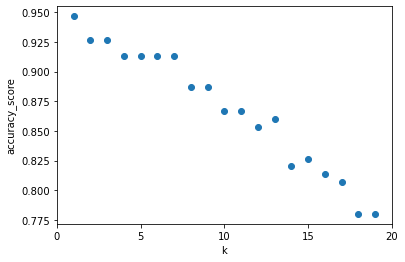

In [134]:
#Plot graph between accuracy score and k
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy_score')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, random_state = 0).fit(X_train, y_train)
print('Accuracy of DT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

decision_tree = tree.DecisionTreeClassifier(random_state = 0)
decision_tree = decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.97
Accuracy score 0.9866666666666667


In [113]:
#Grid Search on Decision Trees
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

grid = GridSearchCV(decision_tree, param_grid = param_dict, cv = 10, verbose=1, n_jobs= -1)
grid.fit(X_train, y_train.values.ravel())

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=5, random_state=0)
0.9742857142857144


In [118]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression().fit(X_train, y_train.values.ravel())

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = GridSearchCV(clf, space, scoring='accuracy', n_jobs=-1, cv=cv)

result = search.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9926666666666667
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train.values.ravel())

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train.values.ravel())

print(grid.best_params_)
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
# print(classification_report(y_test, grid_predictions))
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

In [133]:
from sklearn.svm import SVC

kernel = ['poly','linear','rbf']
score = []
for i in kernel:
    for j in range(1,10,3):
        for k in range(1,5,1):
            clf = SVC(kernel= i, degree = k, decision_function_shape= 'ovr', gamma = j, C = 100).fit(X_train, y_train.values.ravel())
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            score.append(acc)
            Max_acc = max(score)

print("Accuracy using Kernalized SVC", Max_acc)


Accuracy using Kernalized SVC 0.9533333333333334


In [44]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train, y_train.values.ravel())

print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train.values.ravel())))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

y_pred = nbclf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy of GaussianNB classifier on training set: 0.99
Accuracy of GaussianNB classifier on test set: 0.97
Accuracy score 0.9733333333333334


In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_3 = RandomForestClassifier().fit(X_train, y_train.values.ravel())
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf_3.score(X_train, y_train.values.ravel())))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf_3.score(X_test, y_test)))

y_pred = clf_3.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99
Accuracy score 0.9866666666666667


Text(0, 0.5, 'Testing Accuracy')

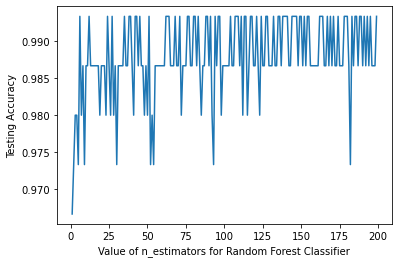

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train.values.ravel())
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.fig
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train.values.ravel())

print(clf.best_params_)
print(clf.best_score_)


{'max_depth': 10, 'max_features': 1}
1.0


In [106]:
clf_5 = RandomForestClassifier( n_estimators = 125, max_depth = 10, max_features = 8, random_state=0).fit(X_train, y_train.values.ravel())
print('Accuracy of RF classifier on training set: {:.2f}'.format(clf_5.score(X_train, y_train.values.ravel())))
print('Accuracy of RF classifier on test set: {:.2f}'.format(clf_5.score(X_test, y_test)))

y_pred = clf_5.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score", score)

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99
Accuracy score 0.9933333333333333


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [1,2,3,4,5,6],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False]}

rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter =10, cv=9)
rnd_search.fit(X_train,y_train.values.ravel())
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'n_estimators': 100, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
0.9970760233918128


In [110]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

rnd_search = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rnd_search.fit(X_train,y_train.values.ravel())
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.9971264367816092


In [137]:
from sklearn.ensemble import GradientBoostingClassifier

clf_6 = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train.values.ravel())
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_6.score(X_train, y_train.values.ravel())))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf_6.score(X_test, y_test)))
y_pred = clf_6.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score 6:", score)


Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.98
Accuracy score 6: 0.98


In [136]:
from sklearn.neural_network import MLPClassifier

clf_8 = MLPClassifier(solver='lbfgs', activation = 'relu',
                         alpha = 1,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train.values.ravel())

print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(clf_8.score(X_train, y_train.values.ravel())))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(clf_8.score(X_test, y_test)))

y_pred = clf_8.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score 7:", score)     

Accuracy of MLP classifier on training set: 0.92
Accuracy of MLP classifier on test set: 0.90
Accuracy score 7: 0.9
